<a href="https://colab.research.google.com/github/ankitarashmi/EVA-Project1/blob/master/EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

In [0]:
image.shape

(364, 400, 3)

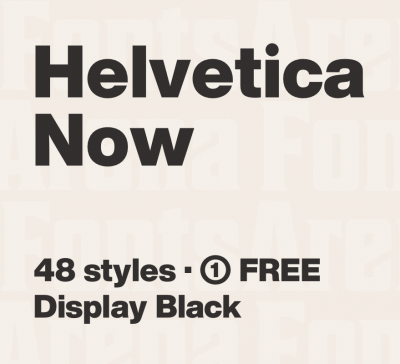

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

In [0]:
edges.shape

(364, 400)

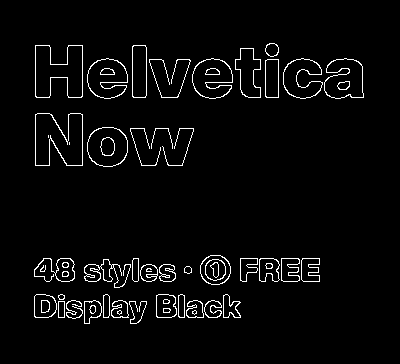

In [0]:
cv2_imshow(edges)

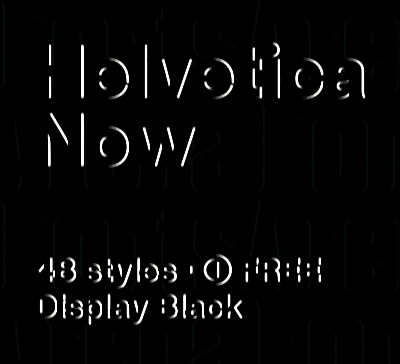

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

#1.Horizontal Edge detector
Using the kernel [-1,-1,-1],[2,2,2],[-1,-1,-1], which has a higher value for the middle row and lower values on upper and lower rows which allowed to show the horizontal edges (up and down).

Tried using values like [1,1,1],[0,0,0],[-1,-1,-1]. This horizontal the edge on top and but not works for botton edges whereas increasing the difference between the middle row of the matrix helped to highlight all the edges on top and bottom.

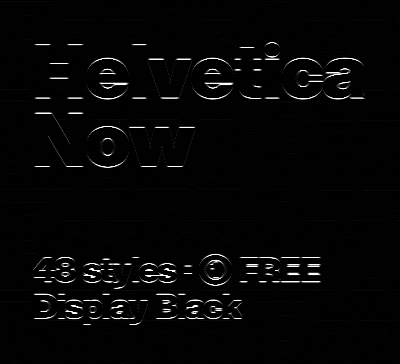

In [0]:
kernel = np.float32([[-1,-1,-1],[2,2,2],[-1,-1,-1]])

dst1 = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst1)

#2. 45 degrees edge detector

On the same principle of keeping higher values for the cell for the desired edge(horizontal or vertical) helped me to highlight the 45 degree edges also where i am keeping a value of "2" for cells that forms a 45 deg angle. 

Although i see alot of dots for cases where there are vertical or horizontal edges. I would like to understand how can we get rid of these as well.

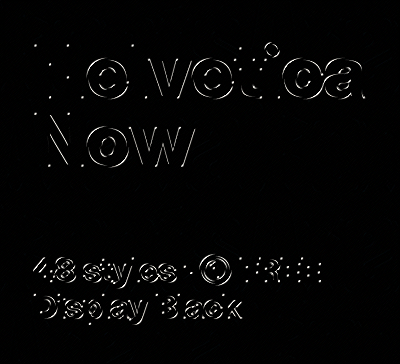

In [0]:
kernel = np.float32([[-1,-1,2],[-1,2,-1],[2,-1,-1]])

dst1 = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst1)

# 3. Blur kernel
Using a value of 1/9 for all the cells of the kernel matrix blurred the image. The thought process is to keep a value that can average out the pixels which can change the values of all the pixels in such a way that they change but not too much.

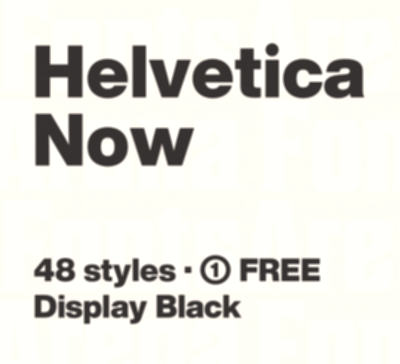

In [0]:
kernel = np.float32([[0.12,0.12,0.12],[0.12,0.12,0.12],[0.12,0.12,0.12]])

dst1 = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst1)

#4. Sharpen kernel
The logic that i understood for using the above kernel is to higher the value of pixel which is at centre and lower the values of the immediate neighbors. This helps in sharpening the image.

Whereas i am not sure what is the difference we should maintain for highlighting the central pixel and lowering the values of its neighbour.

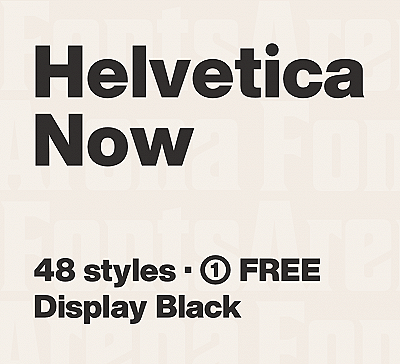

In [0]:
kernel = np.float32([[0,-0.5,0],[-0.5,3,-0.5],[0,-0.5,0]])

dst1 = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst1)

#5. Identical Kernel

My thought process behind this is to keep the pixel values for the next layer as close to the original values.
The values in the next layer will not be same but will be very close. 

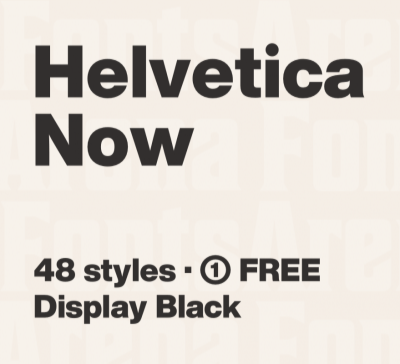

In [0]:
kernel = np.float32([[0,0.1,0],[0,0.81,0],[0,0.1,0]])
dst1 = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst1)